<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade9/atividade_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DCT e compressão de imagens

In [69]:
pip install imshowpair &> /dev/null

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack, ifft
import imshowpair as isp
from skimage import io

In [71]:
import warnings
warnings.filterwarnings('ignore')

##DCT unidimensional

1. Crie um vetor de 5 elementos, aplique a DCT e a IDCT e verifique que o resultado da transformada inversa é igual ao vetor original.

In [82]:
array = [1,2,3,4,5]
dct = fftpack.dct(array)
idct = fftpack.idct(array)

In [86]:
ifft(dct)

array([3.82847018+0.j        , 5.5297718 -1.78885438j,
       7.55599311-1.34164079j, 7.55599311+1.34164079j,
       5.5297718 +1.78885438j])

In [87]:
ifft(idct)

array([1.        +0.j        , 2.42705098-1.76335576j,
       5.79833901-3.37331657j, 5.79833901+3.37331657j,
       2.42705098+1.76335576j])

##DCT bidimensional


1. Defina duas funções, uma para a DCT e outra para a IDCT para sinais bidimensionais como em [1].

In [72]:
#funcao para a DCT
def dct2(a):
    return fftpack.dct(fftpack.dct(a, axis=0, norm='ortho' ), axis=1, norm='ortho')


In [73]:
#funcao da IDCT
def idct2(a):
    return fftpack.idct(fftpack.idct(a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

2. Aplique a DCT em uma imagem e mostre-a como uma imagem. Observe em que região se concentra a maior parte da energia.

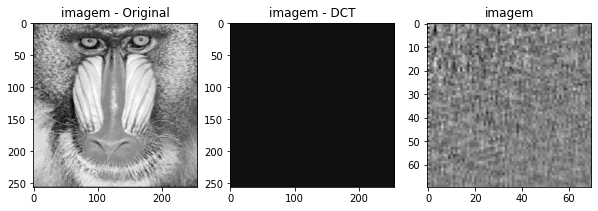

In [74]:
imagem = io.imread('baboon.bmp')

DCT_imagem = dct2(imagem)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 12))

ax1.imshow(imagem, cmap=plt.cm.gray)
ax1.set_title('imagem - Original')

ax2.imshow(DCT_imagem, cmap=plt.cm.gray)
ax2.set_title('imagem - DCT')

ax3.imshow(DCT_imagem[70:140, 0:70], cmap=plt.cm.gray)
ax3.set_title('imagem')

plt.savefig('imagem_DCT.jpg', format='jpg')
plt.show()

##DCT em blocos


1. Aplique a DCT não da imagem como um todo, mas em blocos de 8x8 pixels dessa imagem, como segue.

In [75]:
imsize = imagem.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2(imagem[i:(i+8),j:(j+8)])

2. Extraia um dos blocos de 8x8 pixels da imagem de entrada e mostre a 2D DCT deste bloco como imagem (ver a seguir) e como matriz.

Text(0.5, 1.0, 'An 8x8 DCT block')

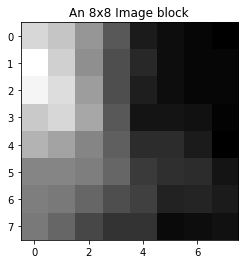

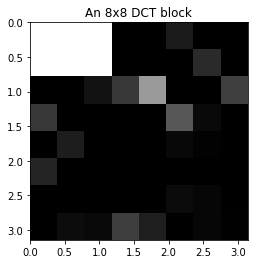

In [76]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(imagem[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block")

3. Mostre a imagem da DCT dos blocos.

Text(0.5, 1.0, '8x8 DCTs of the image')

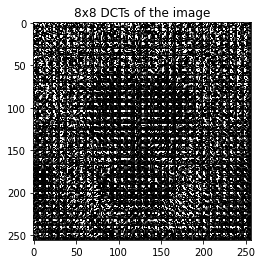

In [77]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

## Limiarização

1. Aplique um limiar aos coeficientes da DCT e depois reconstrua a imagem com a IDCT.

Keeping only 14.772034% of the DCT coefficients


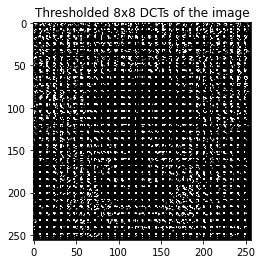

In [78]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

2. Compare a imagem reconstruída com a imagem original, mostrando-as lado a lado.

Text(0.5, 1.0, 'Comparison between original and IDCT compressed images')

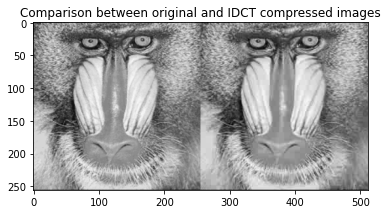

In [79]:
im_dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (imagem, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and IDCT compressed images" )

## Comparação com DFT

1. Compare os resultados da DCT com os da DFT. Comente.

Keeping only 14.772034% of the DCT coefficients
Keeping only 16.267395% of the DFT coefficients


Text(0.5, 1.0, 'Comparison between original, DCT compressed and DFT compressed images')

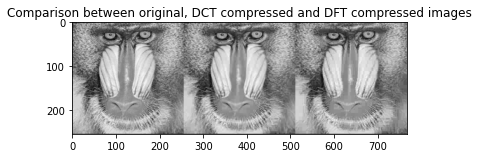

In [80]:
dft = np.zeros(imsize,dtype='complex');
im_dft = np.zeros(imsize,dtype='complex');

# 8x8 DFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2(imagem[i:(i+8),j:(j+8)] )

# Thresh
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))
print("Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (imagem, im_dct, abs(im_dft)) ) ,cmap='gray')
plt.title("Comparison between original, DCT compressed and DFT compressed images" )

Não há diferenças significativas entre as reconstruções.

2. Altere o limiar para emular uma maior ou menor taxa de compressão. Compare as imagens resultantes com a original.

Keeping only 14.772034% of the DCT coefficients
Keeping only 2.281189% of the DFT coefficients


Text(0.5, 1.0, 'Comparison between original, DCT compressed and DFT compressed images')

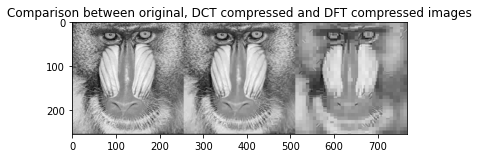

In [81]:
#usando um limiar maior
dft = np.zeros(imsize,dtype='complex');
im_dft = np.zeros(imsize,dtype='complex');

# 8x8 DFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2(imagem[i:(i+8),j:(j+8)] )

# Thresh
thresh = 0.05
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))
print("Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (imagem, im_dct, abs(im_dft)) ) ,cmap='gray')
plt.title("Comparison between original, DCT compressed and DFT compressed images" )

Percebemos que quanto maior a taxa de compressão, a sua resolução diminui.

3. Analise o exemplo de [2] e os resultados em [3].

# Referências

[1] https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html

[2] https://en.wikipedia.org/wiki/JPEG#Discrete_cosine_transform

[3] https://en.wikipedia.org/wiki/JPEG#Effects_of_JPEG_compression

# Bibliografia

BURGER, Wilhelm, BURGE, Mark J. Principles of Digital Image Processing: Core Algorithms. Springer, 2009. (Série: Undergraduate Topics in Computer Science).